# Анализ успешности игр. Сборный проект-1. 

**Датасет:** исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

**Описание данных**  
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Цель и задачи исследования <a class="tocSkip">


**Цель исследования** - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Данные до 2016 года, сейчас декабрь 2016-го, планировать нужно будет следующий год.

**Задачи:**
1. Загрузка данных
2. Предобработка данных
        2.1. Корректировка названий столбцов
        2.2. Преобразование типов данных
        2.3. Обработка пропусков
        2.4. Посчитать суммарные продажи по регионам
3. Исследовательский анализ данных
        3.1. сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
        3.2. как менялись продажи по платформам. Определить платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
        3.3. определить актуальный период для построения прогноза на 2017. Дальнейшие исследования проводить на этих данных
        3.4. Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
        3.5. Построить диаграмму размаха по глобальным продажам игр в разбивке по платформам.
        3.6. как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Соотнести выводы с продажами игр на других платформах
        3.7. Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
4. Составить портрет пользователя каждого региона:
        4.1. Самые популярные платформы (топ-5). Описать различия в долях продаж.
        4.2. Самые популярные жанры (топ-5). Пояснить разницу.
        4.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?
5. Проверка гипотез
        5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
        5.2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
        Как вы сформулировали нулевую и альтернативную гипотезы;
        Какой критерий применили для проверки гипотез и почему.
6. Общий вывод

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
sns.set(
    font_scale=1.5,
    style="white",
    rc={'figure.figsize':(15,5)}
        )

In [3]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Мы загрузили данные, в датасете 16715 строк, 11 колонок, мы видим, что некоторые колонки с неверным типом данных, кое-где есть пропуски, исправим это на этапе предобработки.

## Предобработка данных
### Корректировка названий столбцов
Приведем названия столбцов к snake_case.

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование типов данных

In [9]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Год релиза `year_of_release` распознался как `float`(т.к. в данных есть пропуски), но дробным он быть точно не может. 

In [10]:
df['year_of_release'] = df.year_of_release.astype('Int64')

Также `user_score` это числовой показатель, однако распознан как object. Видимо, в значениях есть какой-то текст.

In [11]:
df.user_score[(~df.user_score.isna()) & ((df.user_score.str.isalpha()))].value_counts()

tbd    2424
Name: user_score, dtype: int64

В значениях кроме цифровых и пропущенных есть текcт `tbd`. Предполагаю, что это т.н. термин-заполнитель, To Be Determined, который может показывать, что значение `user_score` не определено в силу каких-то причин. Так как такое значение есть у игр разных лет, причины не временного характера (быть может, мало оценок или еще какой-то критерий). Будем считать, что эти значения пропущены. (NaN)

In [12]:
df[(~df.user_score.isna()) & ((df.user_score.str.isalpha()))].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


In [13]:
df['user_score'] = df.user_score.replace('tbd', np.nan).astype('float')

In [14]:
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

### Обработка пропусков и дубликатов

In [15]:
#определим функцию, которой будем проверять пропуски в данных
def show_missing_values(df):
    return df.isna().mean()\
                .to_frame()\
                .rename(columns = {0:'missing_values'})\
                .query('missing_values > 0')\
                .sort_values('missing_values', ascending=False)\
                .style.background_gradient('coolwarm')\
                .format("{:.2%}")

In [16]:
show_missing_values(df)

,missing_values
user_score,54.59%
critic_score,51.32%
rating,40.48%
year_of_release,1.61%
name,0.01%
genre,0.01%


In [17]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Мало пропусков в именах, жанрах и годах релиза, много - в оценках. Предполагаю, первые - следствие технических ошибок, второе - значимые пропуски (не существует достоверной оценки игры (мало или нет информации)).

In [18]:
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в названиях и жанрах это те же самые строки, их мы удалим ввиду малочисленности и бесполезности для анализа.

In [19]:
df = df[~df.name.isna()]

In [20]:
#check
show_missing_values(df)

,missing_values
user_score,54.59%
critic_score,51.31%
rating,40.47%
year_of_release,1.61%


Пропусков в годах выхода 269 строк. Возможно, некоторые игры выходили на разных платформах, и год указан на какой-то одной? Тогда у этих игр мы более-менее достоверно сможем заполнить пропущенный год релиза.

In [21]:
df[df.year_of_release.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [22]:
known_game_years = df.name[~df.year_of_release.isna()].unique()

In [23]:
df[(df.year_of_release.isna()) & (df.name.isin(known_game_years))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
678,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16293,AKB1/48: Idol to Guam de Koishitara...,X360,<NA>,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16329,Brothers in Arms: Furious 4,X360,<NA>,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,M
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T


In [24]:
df[df.name == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Действительно, такие игры есть (123 строки). Для примера, Madden NFL 2004 вышла на 4 платформах, и три года из четырех указаны. Думаю, можно заменить эти 123 пропущенных года на основе группировки по названию. (Для случаев, если игра вышла в разное время на разных платформах, возьмем последнее значение.

In [25]:
df['year_of_release'] = df.year_of_release.fillna\
                        (df.groupby('name')['year_of_release']\
                         .transform('last'))

In [26]:
df.year_of_release.isna().sum()

146

Осталось 146 пропущенных значений, которые мы удалим, так для задач дальнейшего исследования знание года выпуска для нас критично важно.

In [27]:
df = df[~df.year_of_release.isna()]

In [28]:
#check
show_missing_values(df)

,missing_values
user_score,54.49%
critic_score,51.26%
rating,40.44%


Пропуски в рейтингах. 

Может быть, заполнить их рейтингами, известными для конкретной игры, просто вышедшей на другой платформе? Однако вполне возможно, что игру для одной плаформы оценили иначе, чем для другой. Проверим.

In [29]:
names_scores = df[~df.user_score.isna()].name.to_list()

In [30]:
df[(df.user_score.isna()) & (df.name.isin(names_scores))].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
71,Donkey Kong Country,SNES,1994,Platform,4.36,1.71,3.00,0.23,NaN,NaN,NaN
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,NaN,E
182,Tomb Raider II,PS,1997,Action,2.30,2.46,0.20,0.28,85.0,NaN,T
225,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,NaN,NaN,NaN
232,The Legend of Zelda: A Link to the Past,SNES,1991,Action,2.42,0.91,1.15,0.13,NaN,NaN,NaN


In [31]:
df[df.name == 'Zumba Fitness']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,NaN,E
669,Zumba Fitness,X360,2010,Sports,1.74,0.45,0.0,0.18,42.0,5.5,E
3516,Zumba Fitness,PS3,2010,Sports,0.28,0.21,0.0,0.08,NaN,3.8,E


Действительно, рейтинги могут отличаться у одной игры и разных платформ. 

Оставим пропуск в рейтингах как есть. Их слишком много, удалять такой пласт информации мы не будем, заполнить достоверно не сможем. 

(Как мы помним, значение tbd мы также решили отнетси к пропускам. (см. раздел 2.2.))

In [32]:
df.duplicated().sum()

0

In [33]:
df[df.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,2006,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


В данных есть неявные дубликаты по названию и платформе, 4 строки. Не будем ничего с ними делать: во-первых, 3 из них: 2шт Need for Speed и Соник - явно переиздания, то есть, фактически, разные игры. А ради одной Madden NFL 13 заморачиваться не будем

Пропуски в возрастных рейтингах заменим заглушкой (нет инфомации), для облегчения дальнейшего анализа.

In [34]:
df['rating'] = df['rating'].fillna('no_info')

#check
show_missing_values(df)

,missing_values
user_score,54.49%
critic_score,51.26%


### Суммарные продажи по регионам

In [35]:
df['all_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales

In [36]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_info,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_info,31.38


Мы провели предобработку данных для дальнейшего анализа.
  
Преобразовали неверно считанные данные в нужный тип, удалили строки с пропущенными значениями (названия и, частично, год релиза): всего около 1% данных. Удалили буквенные обозначения неизвестных оценок (использовав вместо этого Nan), провели поиск дубликатов и добавили в датасет столбец с суммой продаж по всем регионам.  

## Исследовательский анализ данных
### Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [37]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_info,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_info,31.38


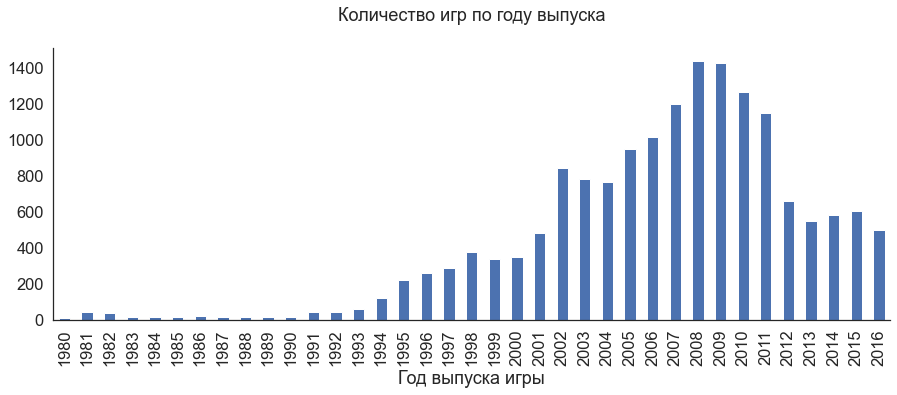

In [38]:
df.groupby('year_of_release')[['name']].count().plot(legend=False, 
                                                     title='Количество игр по году выпуска\n', 
                                                     kind='bar');
plt.xlabel('Год выпуска игры')
sns.despine()

Мы видим число игр, выпущенных на всех платформах, в разрезе лет. Отфильтруем также только самую первую версию игры, если они выходили на нескольких платформах.

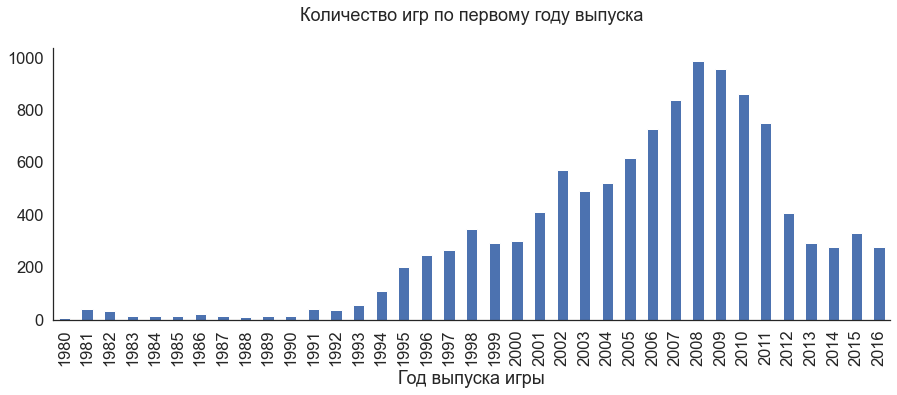

In [39]:
df.groupby('name', as_index=False)\
                        [['year_of_release']]\
                        .agg('first')\
                        .groupby('year_of_release')\
                        ['name']\
                        .count()\
                        .plot(legend=False, 
                             title='Количество игр по первому году выпуска\n', 
                             kind='bar');
plt.xlabel('Год выпуска игры')
sns.despine()

Тенденции видим одинаковые: стремительный рост выпускаемых в год игр, начиная с 1994 по 2008, плавное падение и резкий обвал после (мобильные игры. будь они неладны) 

In [40]:
df['year_of_release'].value_counts(bins=5,
                             sort=False, normalize=True)

(1979.963, 1987.2]    0.010442
(1987.2, 1994.4]      0.018893
(1994.4, 2001.6]      0.140279
(2001.6, 2008.8]      0.422768
(2008.8, 2016.0]      0.407618
Name: year_of_release, dtype: float64

Очевидно, что данные до 1995 года можно не брать в расчет в принципе, их число очень незначительно. (менее 3%)

### Как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Платформы с наибольшими суммарными продажам за все время (топ-10)

In [41]:
top_10_platform_df = df.groupby('platform')\
                            [['all_sales']]\
                            .sum()\
                            .sort_values('all_sales', ascending=False)\
                            .head(10)
top_10_platform_df

,all_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


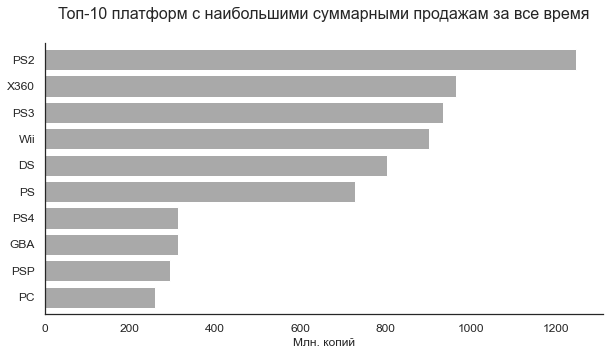

In [42]:
ax = df.groupby('platform')[['all_sales']]\
                    .sum()\
                    .sort_values('all_sales')\
                    .tail(10).\
                    plot(kind='barh', 
                         legend=False, 
                         figsize=(10,5), 
                         width=0.8, 
                         color='darkgrey', 
                         fontsize=12);
ax.set_ylabel('')
ax.set_xlabel('Млн. копий', fontsize=12)
ax.set_title('Топ-10 платформ с наибольшими суммарными продажам за все время\n', fontsize = 16)
sns.despine()

In [43]:
top_10_platform = top_10_platform_df.index.to_list()

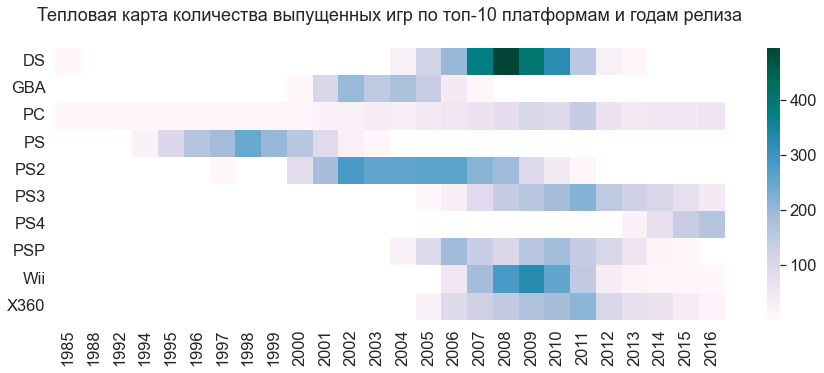

In [44]:
df_grouped = df[df.platform.isin(top_10_platform)]\
                .groupby(['platform','year_of_release'])['all_sales']\
                                .agg(['count']).unstack()
ax = sns.heatmap(df_grouped, cmap='PuBuGn');
ax.set_title('Тепловая карта количества выпущенных игр по топ-10 платформам и годам релиза\n')
x_labels = [i.get_text()[-4:] for i in ax.get_xticklabels()]
ax.set_xticklabels(x_labels);
ax.set_xlabel('');
ax.set_ylabel('');

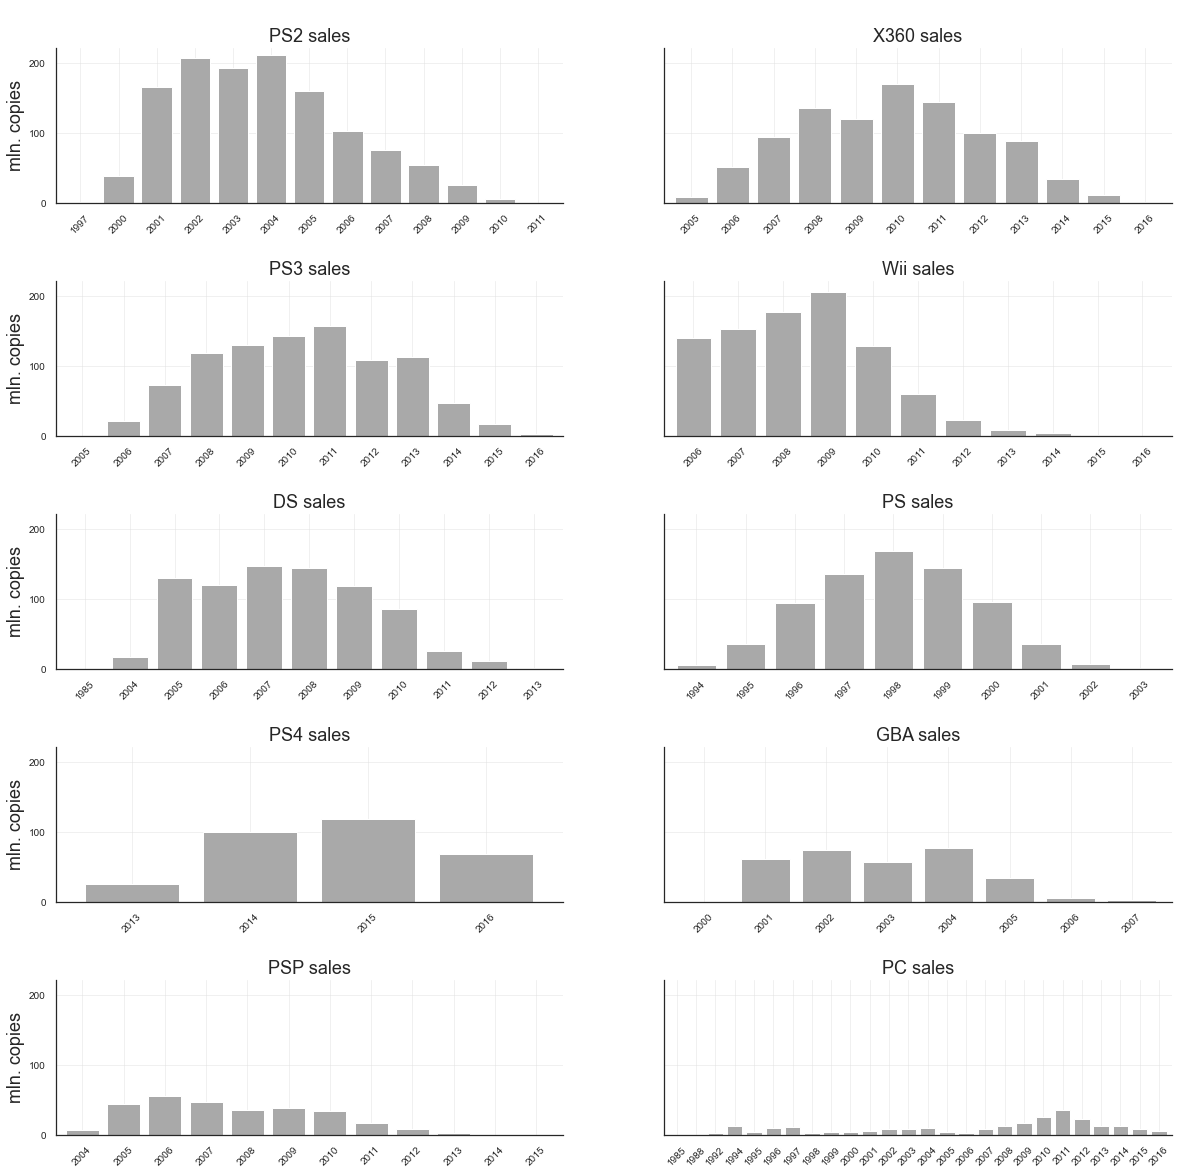

In [45]:
fig, axes = plt.subplots(5, 2, figsize=(20,20), sharey=True, sharex=False)
axes = axes.flatten()
for platform,  ax in zip(top_10_platform, axes):
    df[df.platform == platform].groupby('year_of_release')['all_sales']\
                                .agg(['sum'])\
                                .plot(kind='bar', 
                                      ax=ax, 
                                     title=f'\n{platform} sales',
                                     fontsize=10,
                                     xlabel='',
                                      ylabel='mln. copies',
                                     legend=False,
                                     width=0.8,
                                     color='darkgrey',
                                     rot=45)
    
    ax.grid(True, color='#e2e2e2', alpha=0.5)
    plt.subplots_adjust(hspace=0.5)
    sns.despine()

In [46]:
df.groupby('platform')\
            .agg({'all_sales':'sum', 'year_of_release': lambda x: x.max() - x.min()})\
            .sort_values('all_sales', ascending=False)\
            .rename(columns={'year_of_release':'years_of_live'})\
            .head(10)

,all_sales,years_of_live
platform,,
PS2,1247.16,14
X360,966.61,11
PS3,935.19,11
Wii,903.31,10
DS,804.28,28
PS,727.58,9
PS4,314.14,3
GBA,313.73,7
PSP,293.57,11


Мы видим, что топ-10 платформ по общим продажам в разбивке по годам выглядят примерно одинаково: их жизненный цикл составляет около 10 лет от появления до исчезновения. Явно выбиваются 3 значения (DS - на графике мы видим, что продажа в 1985 явно ошибка в данных(удалим ее), PC в силу специфики - компьютерные игры всегда выпускаются, и PS4, которая вышла всего 3 года назад) 

In [47]:
df[(df.platform == 'DS') & (df.year_of_release == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,no_info,0.02


In [48]:
df = df[~((df.platform == 'DS') & (df.year_of_release == 1985))]

In [49]:
#check
df.groupby('platform')\
            .agg({'all_sales':'sum', 'year_of_release': lambda x: x.max() - x.min()})\
            .sort_values('all_sales', ascending=False)\
            .rename(columns={'year_of_release':'years_of_live'})\
            .head(10)

,all_sales,years_of_live
platform,,
PS2,1247.16,14
X360,966.61,11
PS3,935.19,11
Wii,903.31,10
DS,804.26,9
PS,727.58,9
PS4,314.14,3
GBA,313.73,7
PSP,293.57,11


### Определить актуальный период для построения прогноза на 2017

Исходя из среднего жизненного цикла платформы и количества игр, выпускавшихся по годам, можно предположить, что период, позволивший нам сделать прогноз на 2017 год - 5 лет.  
Во-первых, среднее количество игр, вышедших в последние 5 лет, очень отличается от предыдущих периодов.  
Во-вторых, это как раз тот срок, за который можно увидеть тенденцию роста или падения популярности той или иной платформы.  
В-третьих, возможно, данные за 2016 неполные, так что актуальный период меньше 5 лет тоже брать нецелесообразно.

In [50]:
df.groupby('year_of_release')['all_sales'].sum().tail(5)

year_of_release
2012    360.52
2013    361.76
2014    331.88
2015    267.98
2016    129.94
Name: all_sales, dtype: float64

Датасет для дальнейшего исследования

In [51]:
df_5 = df[df.year_of_release >= 2012].copy()

In [52]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2899 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2899 non-null   object 
 1   platform         2899 non-null   object 
 2   year_of_release  2899 non-null   Int64  
 3   genre            2899 non-null   object 
 4   na_sales         2899 non-null   float64
 5   eu_sales         2899 non-null   float64
 6   jp_sales         2899 non-null   float64
 7   other_sales      2899 non-null   float64
 8   critic_score     1322 non-null   float64
 9   user_score       1540 non-null   float64
 10  rating           2899 non-null   object 
 11  all_sales        2899 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 297.3+ KB


In [53]:
show_missing_values(df_5)

,missing_values
critic_score,54.40%
user_score,46.88%


### Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.

In [54]:
df_5.groupby('platform')['all_sales']\
                    .sum()\
                    .sort_values(ascending=False)

platform
PS4     314.14
PS3     289.71
X360    237.52
3DS     195.01
XOne    159.32
WiiU     82.19
PC       63.51
PSV      49.18
Wii      36.60
DS       13.21
PSP      11.69
Name: all_sales, dtype: float64

In [55]:
platforms_5 = df_5.groupby('platform')\
                        ['all_sales']\
                        .sum()\
                        .sort_values(ascending=False)\
                        .index\
                        .to_list()

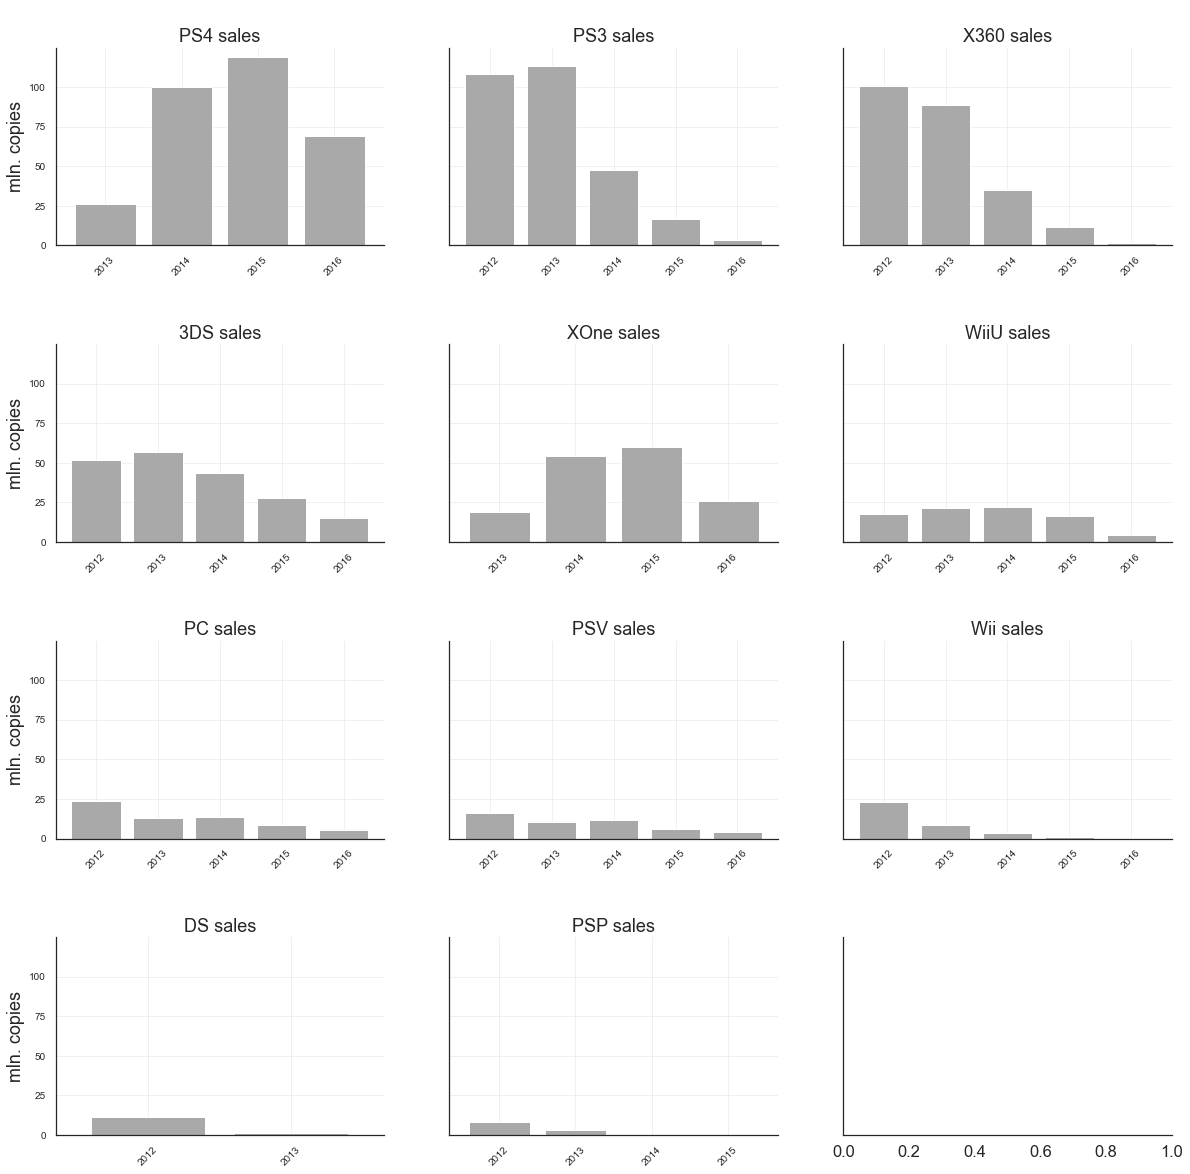

In [56]:
fig, axes = plt.subplots(4, 3, figsize=(20,20), sharey=True, sharex=False)
axes = axes.flatten()
for platform,  ax in zip(platforms_5, axes):
    df_5[df_5.platform == platform].groupby('year_of_release')['all_sales']\
                                .agg(['sum'])\
                                .plot(kind='bar', 
                                      ax=ax, 
                                     title=f'\n{platform} sales',
                                     fontsize=10,
                                     xlabel='',
                                      ylabel='mln. copies',
                                     legend=False,
                                     width=0.8,
                                     color='darkgrey',
                                     rot=45)
    
    ax.grid(True, color='#e2e2e2', alpha=0.5)
    plt.subplots_adjust(hspace=0.5)
    sns.despine()

Наиболее перспективная платформа - PlayStation 4, она на первом месте по прибыльности, причем имеет тренд на рост. PlayStation 3 и Xbox 360 на 2 и 3 месте по числу проданных копий, однако с каждым годом их продажи снижаются (как и у Nintendo 3DS). Вторая перспективная платформа, набирающая обороты - Xbox One (преемница Xbox 360). 

### Построить диаграмму размаха по глобальным продажам игр в разбивке по платформам.

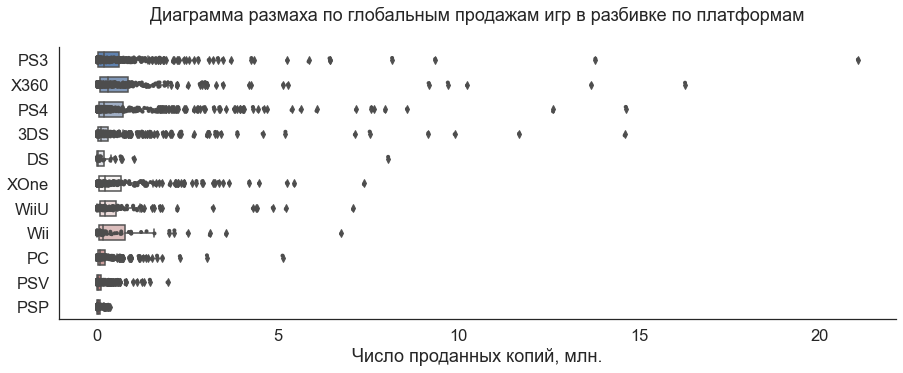

In [57]:
ax = sns.boxplot(y = 'platform', 
                 x = 'all_sales', 
                 data = df_5, 
                 orient="h", 
                 palette="vlag", width=.6)
sns.stripplot(y = 'platform', 
                 x = 'all_sales', 
                 data = df_5,
              size=4, color=".3", linewidth=0)
ax.set_title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам\n')
ax.set_xlabel('Число проданных копий, млн.')
ax.set_ylabel('')
sns.despine();

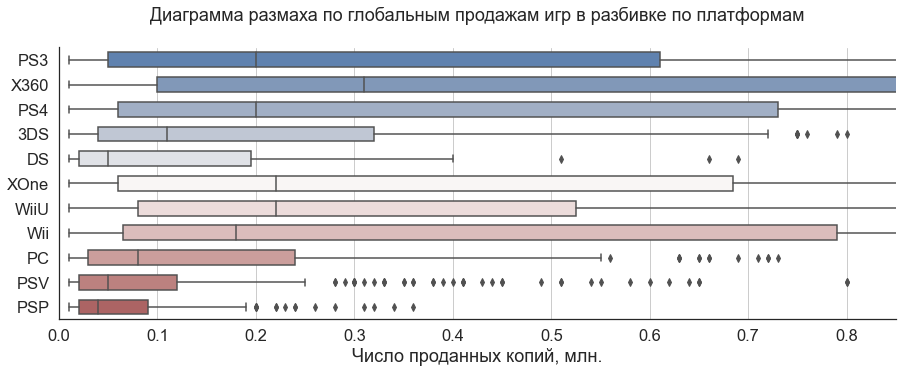

In [58]:
ax = sns.boxplot(y = 'platform', 
                 x = 'all_sales', 
                 data = df_5, 
                 orient="h", 
                 palette="vlag",
                 width=.6)
ax.set_title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам\n')
ax.set_xlabel('Число проданных копий, млн.')
ax.set_ylabel('')
ax.set_xlim(0,0.85)
ax.xaxis.grid(True)
sns.despine();

Мы видим, что большее количество игр продаются небольшим количеством экземпляром, однако у платформ-лидеров по числу продаж есть хитовые игры (статистические выбросы), которые продаются огромным количеством экземпляров, за счет них платформы и являются очень популярными. Если отсечь большую часть выбросов и "приблизить" боксплоты, что, к примеру, медианное число млн. продаж средней игры у Xbox 360 (3 место по числу продаж за 5 лет) больше, чем у лидера нашего чарта PlayStation 4.    
  
PS3 и PS4 продавали игры в среднем примерно одинаковым количеством экземпляров, как, впрочем,  Wii U и Xbox One.   
  
В целом все платформы в основном продают игры малым числом экземпляров (медиана менее 0,5 миллиона копий).

In [59]:
df_5.groupby('platform')\
                ['all_sales']\
                .agg(['count', 'mean', 'median'])\
                .reset_index()\
                .sort_values('mean', ascending=False)

,platform,count,mean,median
9,X360,294,0.807891,0.31
4,PS4,392,0.801378,0.20
7,Wii,55,0.665455,0.18
10,XOne,247,0.645020,0.22
3,PS3,494,0.586457,0.20
8,WiiU,147,0.559116,0.22
0,3DS,397,0.491209,0.11
1,DS,32,0.412813,0.05
2,PC,255,0.249059,0.08
6,PSV,411,0.119659,0.05


### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Соотнести выводы с продажами игр на других платформах

Для ответа на этот вопрос исключим данные без отзывов пользователей и критиков (возьмем PS4 как самую перспективную платформу).

In [60]:
df_ps4 = df_5.query('critic_score == critic_score \
            and user_score == user_score\
            and platform == "PS4"')

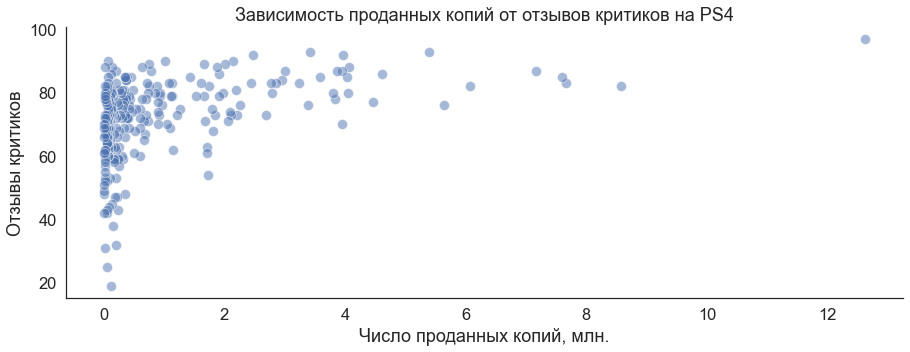

In [61]:
ax = sns.scatterplot(data=df_ps4, y='critic_score', x='all_sales', alpha=0.5, s=100);
ax.set_title('Зависимость проданных копий от отзывов критиков на PS4');
ax.set_xlabel('Число проданных копий, млн.')
ax.set_ylabel('Отзывы критиков')
sns.despine();

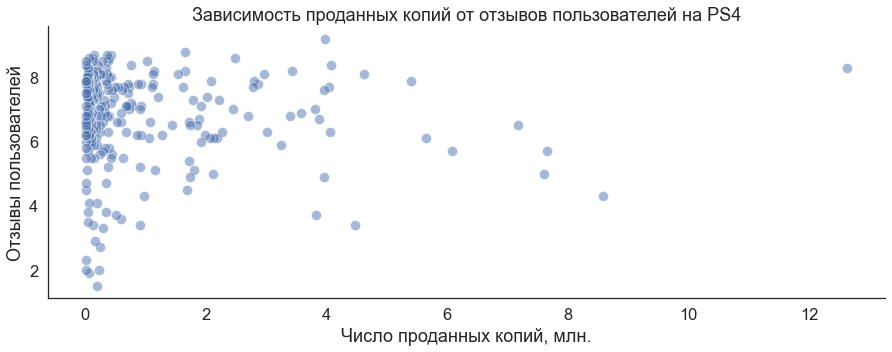

In [62]:
ax = sns.scatterplot(data=df_ps4, y='user_score', x='all_sales', alpha=0.5, s=100);
ax.set_title('Зависимость проданных копий от отзывов пользователей на PS4');
ax.set_xlabel('Число проданных копий, млн.')
ax.set_ylabel('Отзывы пользователей')
sns.despine();

In [63]:
df_ps4.all_sales.corr(df.critic_score)

0.40589480145836687

In [64]:
df_ps4.all_sales.corr(df.user_score)

-0.03362497596528878

Как мы видим, между числом проданных копий и отзывами критиков есть средняя положительная взаимосвязь, что мы видим и на диаграмме рассеяния: наиболее продаваемые игры обычно имеют оценки критиков выше среднего. Однако корреляции между отзывами пользователей и количеством проданных экземпляров нет: бестселлеры могут быть плохо оценены пользователями.    


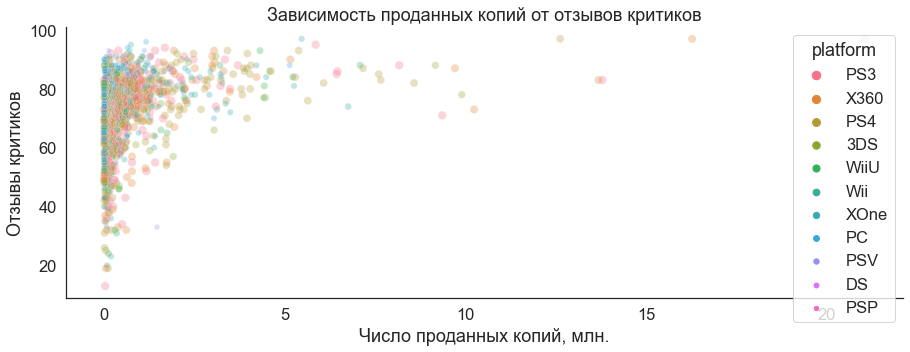

In [65]:
ax = sns.scatterplot(data=df_5.query('critic_score == critic_score \
            and user_score == user_score'), 
                y='critic_score', 
                x='all_sales', 
                hue='platform',
                     size='platform',
                alpha=0.3, legend='full')
ax.set_title('Зависимость проданных копий от отзывов критиков');
ax.set_xlabel('Число проданных копий, млн.')
ax.set_ylabel('Отзывы критиков')
sns.despine();

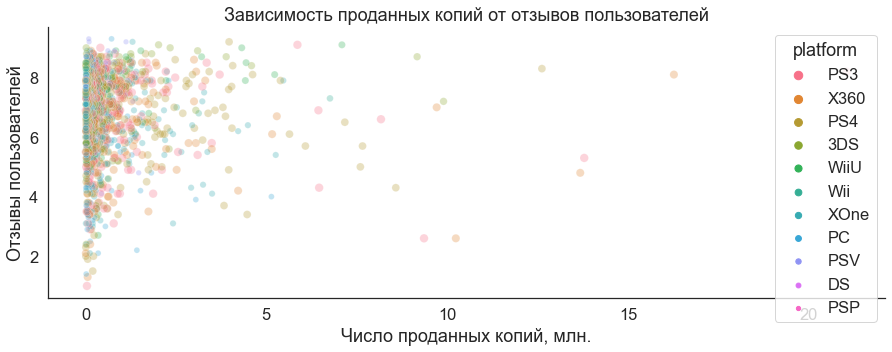

In [66]:
ax = sns.scatterplot(data=df_5.query('critic_score == critic_score \
            and user_score == user_score'), 
                y='user_score', 
                x='all_sales', 
                hue='platform',
                     size='platform',
                alpha=0.3, legend='full')
ax.set_title('Зависимость проданных копий от отзывов пользователей');
ax.set_xlabel('Число проданных копий, млн.')
ax.set_ylabel('Отзывы пользователей')
sns.despine();

Примерно та же картина и на других платформах. Критики хвалят игру, ее продают, а потом мы узнаем непредвзятую оценку пользователей)

### Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [67]:
df_5.groupby('genre')\
                ['all_sales']\
                .agg(['count', 'sum', 'mean', 'median'])\
                .sort_values('sum', ascending=False)\
                .rename(columns={'count':'games_count', 
                                 'sum':'sum_sales', 
                                 'mean':'mean_sales', 
                                 'median':'median_sales'}).reset_index()

,genre,games_count,sum_sales,mean_sales,median_sales
0,Action,1041,446.41,0.428828,0.120
1,Shooter,237,304.75,1.285865,0.430
2,Role-Playing,370,192.80,0.521081,0.140
3,Sports,268,181.07,0.675634,0.240
4,Misc,193,85.28,0.441865,0.120
5,Platform,85,61.00,0.717647,0.210
6,Racing,115,53.50,0.465217,0.140
7,Fighting,109,44.49,0.408165,0.130
8,Simulation,80,35.12,0.439000,0.120
9,Adventure,302,29.43,0.097450,0.030


Мы видим, что больше всего миллионов копий продано в жанре Action, однако, по большей части, из-за большого количества игр в этом жанре. Однако наиболее прибыльный жанр - Shooter, игра в этом жанре в среднем продается гораздо большим количеством копий. Второе место по прибыльности делят платформеры и спортивные игры.

Хуже всего продаются игры в жанре Adventure. Что тут сказать? Печально. Стрелялки продаются лучше квестов, может, потому и мир вокруг такой (сорри за оффтоп).

## Составить портрет пользователя каждого региона:
### Самые популярные платформы (топ-5)

В датасете продажи делятся на 4 региона: Северная Америка, Европа, Япония, и остальные. (na_sales	eu_sales	jp_sales	other_sales)

Напишем функции - чтобы выводить топ-N по признаку для каждого региона, и график по всем регионам. Нам нужен Топ-5, но сделаем функцию масштабируемой, чтобы выводить любое число.

In [68]:
def table_popular_top_num(df, region, feature, num=5):
    df = df.groupby(feature)[region]\
                .agg(['sum', 'mean', 'median'])\
                .sort_values('sum', ascending=False)\
                .rename(columns={'sum':f'sum_sales_{region.split("_")[0]}', 
                                 'mean':f'mean_sales_{region.split("_")[0]}', 
                                 'median':f'median_sales_{region.split("_")[0]}'})\
                .reset_index()\
                .head(num)\
                .round(2)
    return df

In [69]:
def chart_popular_top_num(df, regions, feature, num=5):
    fig, axes = plt.subplots(2, 2, figsize=(20,num*1.4), sharey=False, sharex=False)
    axes = axes.flatten()
    for region, ax in zip(regions, axes):
        title = f'Top-{num} popular {feature} by region {region.split("_")[0].upper()} с 2012 по 2016'
        df_temp = df.groupby(feature)[region]\
                .agg(['sum'])\
                .sort_values('sum')\
                .tail(num)\
                .plot(kind='barh', ax=ax, y='sum',
                     title=title,
                     fontsize=12,
                     xlabel='',
                      ylabel='',
                     legend=False,
                     width=0.8,
                     color='darkgrey')
        ax.grid(True, color='#e2e2e2', alpha=0.5)
        plt.subplots_adjust(hspace=0.5)
        sns.despine()   
    return fig

In [70]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

Посмотрим на Топ-5 платформ по числу проданных копий по регионам. (а можем и на 10)

In [71]:
num = 5
for region in regions:
    print(f'\nТоп-{num} популярных платформ по региону {region.split("_")[0].upper()} с 2012 по 2016')
    display(table_popular_top_num(df_5, region, 'platform', num))
    print('--------------------------------------------')


Топ-5 популярных платформ по региону NA с 2012 по 2016


,platform,sum_sales_na,mean_sales_na,median_sales_na
0,X360,140.57,0.48,0.17
1,PS4,108.74,0.28,0.06
2,PS3,103.74,0.21,0.05
3,XOne,93.12,0.38,0.12
4,3DS,55.49,0.14,0.00


--------------------------------------------

Топ-5 популярных платформ по региону EU с 2012 по 2016


,platform,sum_sales_eu,mean_sales_eu,median_sales_eu
0,PS4,141.09,0.36,0.08
1,PS3,107.27,0.22,0.03
2,X360,74.89,0.25,0.10
3,XOne,51.59,0.21,0.07
4,3DS,42.83,0.11,0.00


--------------------------------------------

Топ-5 популярных платформ по региону JP с 2012 по 2016


,platform,sum_sales_jp,mean_sales_jp,median_sales_jp
0,3DS,87.79,0.22,0.06
1,PS3,35.29,0.07,0.03
2,PSV,21.04,0.05,0.03
3,PS4,15.96,0.04,0.01
4,WiiU,13.01,0.09,0.00


--------------------------------------------

Топ-5 популярных платформ по региону OTHER с 2012 по 2016


,platform,sum_sales_other,mean_sales_other,median_sales_other
0,PS4,48.35,0.12,0.03
1,PS3,43.41,0.09,0.02
2,X360,20.49,0.07,0.03
3,XOne,14.27,0.06,0.02
4,3DS,8.90,0.02,0.00


--------------------------------------------


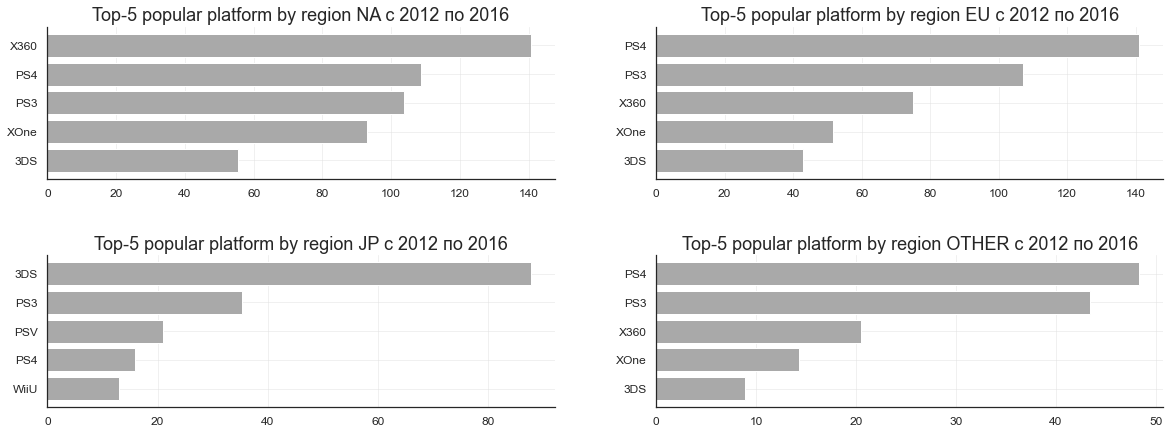

In [72]:
chart_popular_top_num(df_5, regions, 'platform', num);

Мы видим, что по всем регионам, кроме Японии топ-5 делят Microsoft (XBox) и Sony (PS3, PS4), и небольшую часть занимает Nintendo. Однако на японском рынке другая картина - XBox вообще не вошел в топ, его поделили между собой Sony и Nintendo, на 1 месте с большим отрывом лидирует Nintendo 3DS.

### Самые популярные жанры (топ-5)

In [73]:
num = 5
for region in regions:
    print(f'\nТоп-5 популярных жанров по региону {region.split("_")[0].upper()} с 2012 по 2016')
    display(table_popular_top_num(df_5, region, 'genre', num))
    print('-----------------------------------------------')


Топ-5 популярных жанров по региону NA с 2012 по 2016


,genre,sum_sales_na,mean_sales_na,median_sales_na
0,Action,180.15,0.17,0.02
1,Shooter,144.79,0.61,0.20
2,Sports,81.53,0.30,0.08
3,Role-Playing,64.00,0.17,0.02
4,Misc,38.19,0.20,0.01


-----------------------------------------------

Топ-5 популярных жанров по региону EU с 2012 по 2016


,genre,sum_sales_eu,mean_sales_eu,median_sales_eu
0,Action,161.70,0.16,0.02
1,Shooter,113.47,0.48,0.17
2,Sports,69.09,0.26,0.05
3,Role-Playing,48.53,0.13,0.01
4,Racing,27.29,0.24,0.09


-----------------------------------------------

Топ-5 популярных жанров по региону JP с 2012 по 2016


,genre,sum_sales_jp,mean_sales_jp,median_sales_jp
0,Role-Playing,65.44,0.18,0.06
1,Action,52.80,0.05,0.01
2,Misc,13.10,0.07,0.02
3,Simulation,10.41,0.13,0.00
4,Fighting,9.44,0.09,0.03


-----------------------------------------------

Топ-5 популярных жанров по региону OTHER с 2012 по 2016


,genre,sum_sales_other,mean_sales_other,median_sales_other
0,Action,51.76,0.05,0.01
1,Shooter,37.26,0.16,0.05
2,Sports,22.44,0.08,0.02
3,Role-Playing,14.83,0.04,0.01
4,Misc,7.67,0.04,0.00


-----------------------------------------------


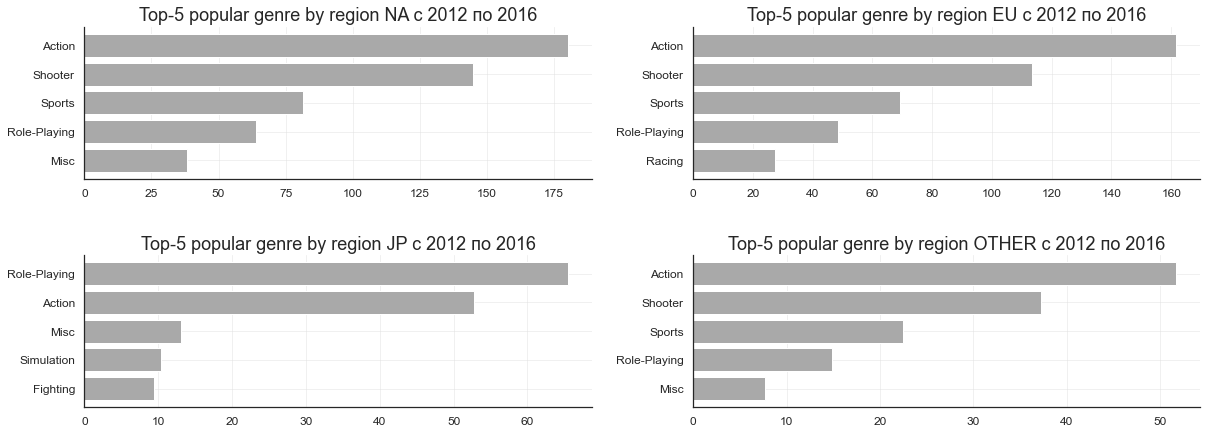

In [74]:
chart_popular_top_num(df_5, regions, 'genre', 5);

В топе продаж Северной Америки и других рынков одни и те же игры - экшены, шутеры, спорт, рпг (и жанр другие), в Европе, в общем, все так же, но на 5 место выходят гонки. В Японии же опять совсем другая картина - популярнейшие в Европе и Америке экшены отходят на 2 место, уступая РПГ, третье место отдано разному, а также в топ входят симуляторы и файтинги. Интересно, что файтинги популярнее шутеров, возможно, дело в том, что в японской культуре боевые искусства в принципе популярнее, чем бой с оружием. 

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Рейтинг ESRB в нашем датасете принимает значения 'M', 'E', 'E10+', 'T' (Mature(17+), Everyone, Everyone10 and older, Teens). 

In [75]:
df_5.rating.unique()

array(['M', 'no_info', 'E', 'E10+', 'T'], dtype=object)

In [76]:
num = 5
for region in regions:
    print(f'\nЗависимость продаж от рейтинга ESRB по региону {region.split("_")[0].upper()} с 2012 по 2016')
    display(table_popular_top_num(df_5, region, 'rating', num))
    print('-----------------------------------------------')


Зависимость продаж от рейтинга ESRB по региону NA с 2012 по 2016


,rating,sum_sales_na,mean_sales_na,median_sales_na
0,M,231.67,0.46,0.15
1,E,114.37,0.29,0.07
2,no_info,103.31,0.08,0.00
3,E10+,77.93,0.25,0.13
4,T,66.02,0.16,0.05


-----------------------------------------------

Зависимость продаж от рейтинга ESRB по региону EU с 2012 по 2016


,rating,sum_sales_eu,mean_sales_eu,median_sales_eu
0,M,194.44,0.39,0.13
1,E,113.03,0.29,0.06
2,no_info,91.50,0.07,0.00
3,E10+,57.25,0.18,0.11
4,T,52.96,0.13,0.04


-----------------------------------------------

Зависимость продаж от рейтинга ESRB по региону JP с 2012 по 2016


,rating,sum_sales_jp,mean_sales_jp,median_sales_jp
0,no_info,109.08,0.09,0.03
1,E,28.33,0.07,0.00
2,T,26.02,0.06,0.01
3,M,21.20,0.04,0.00
4,E10+,8.19,0.03,0.00


-----------------------------------------------

Зависимость продаж от рейтинга ESRB по региону OTHER с 2012 по 2016


,rating,sum_sales_other,mean_sales_other,median_sales_other
0,M,63.45,0.13,0.04
1,E,31.44,0.08,0.02
2,no_info,27.17,0.02,0.00
3,T,17.94,0.04,0.01
4,E10+,16.78,0.05,0.03


-----------------------------------------------


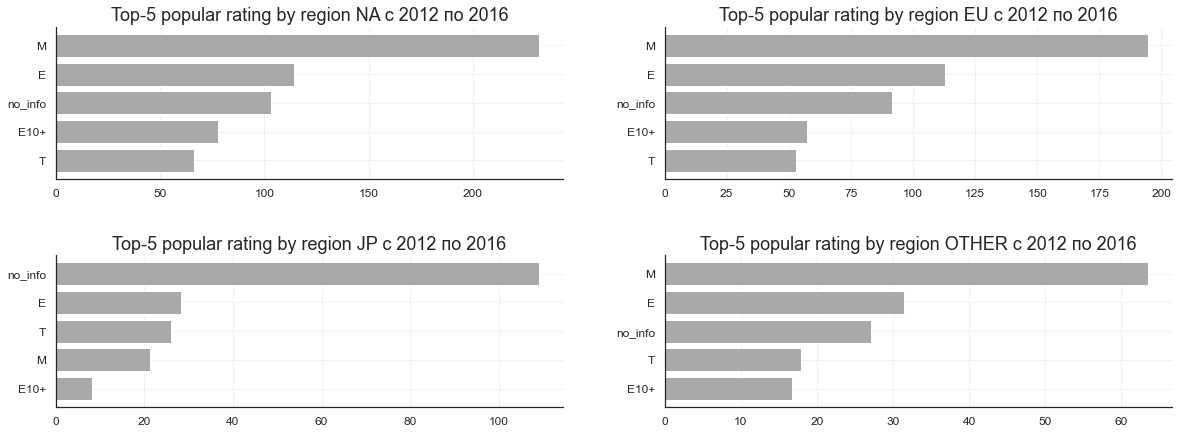

In [77]:
chart_popular_top_num(df_5, regions, 'rating', 5);

Уже привычно мы видим отличия японского рынка от Америки и Европы, если там в топе продаж игры для взрослых, которые лидируют с большим отрывом, на втором - игры для всей семьи. В Японии на первом месте - игры без рейтинга. Это можно объяснить тем, что  ESRB - это североамериканская система возрастного рейтинга (если издатель желает выпустить игру в Японии, там он будет иметь дело с системой оценок от CERO, которая занимается данным вопросом с 2002 года). 
  
Таким образом, ESRB оказывет влияние только на западных покупателей, в Японии в топе продаж игры, не отмеченные ESRB, так что мы не можем с уверенностью определить возрастную категорию типичного японского игрока.

Итак, типичный игрок для западного рынка - взрослый, играющий в экшены и шутеры на пристаках Sony и Microsoft, для японского рынка - игрок неизвестного возраста, играющий в РПГ или экшены на Nintendo или Sony

## Проверка гипотез
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


Проверим гипотезу о равенстве рейтингов платформ Xbox One и PC. 

H_0 нулевая - средний пользовательский рейтинг платформы Xbox One == среднему рейтингу PC.   
Н_1 альтернатиная - средний пользовательский рейтинг платформы Xbox One != среднему рейтингу PC.   
p_value = 0.05

In [78]:
xone_df = df_5.query('user_score == user_score and platform == "XOne"')
pc_df = df_5.query('user_score == user_score and platform == "PC"')

In [79]:
xone_df.user_score.mean()

6.52142857142857

In [80]:
pc_df.user_score.mean()

6.44549763033175

Мы видим, что средние рейтинги выборок похожи, отличия в сотых долях. Проверим, верна ли гипотеза о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, используя тест Стьюдента для незаисимых выборок.

In [81]:
stat, p_value = st.ttest_ind(xone_df.user_score, pc_df.user_score)

In [82]:
alpha = 0.05

In [83]:
p_value

0.6252774522173157

Мы видим, что вероятность получить такие, или еще более сильные различия между выборками при условии, что нулевая гипотеза верна 0.62, что очень много, значительно боьше порога в 0.05. Значит, мы не можем отклонить нулевую гипотезу. 

### Средние пользовательские рейтинги жанров Action и Sports  разные

Проверим гипотезу о равенстве рейтингов жанров Action и Sports. 

H_0 нулевая - средний пользовательский рейтинг жанра Action == среднему рейтингу Sports.   
Н_1 альтернатиная - средний пользовательский рейтинг жанра Action != среднему рейтингу Sports.   
p_value = 0.05

In [84]:
action_df = df_5.query('user_score == user_score and genre == "Action"')
sport_df = df_5.query('user_score == user_score and genre == "Sports"')

In [85]:
action_df.user_score.mean()

6.83427495291903

In [86]:
sport_df.user_score.mean()

5.455897435897437

Мы видим, что средние рейтинги выборок различаются довольно сильно. Проверим, верна ли гипотеза о неравенстве среднего двух генеральных совокупностей по взятым из них выборкам, используя тест Стьюдента для независимых выборок, т. е. насколько высока вероятность получить такие различия, если нулевая гипотеза верна и средние равны.

In [87]:
stat, p_value = st.ttest_ind(action_df.user_score, sport_df.user_score)

In [88]:
alpha = 0.05

In [89]:
p_value

1.1405639632267916e-26

Мы видим, что вероятность получить такие, или еще более сильные различия между выборками при условии, что нулевая гипотеза верна очень мала, значительно меньше 0,05. Значит, мы отклоняем нулевую гипотезу и имеем основания принять гипотезу о неравентве рейтингов жанров Action и Sports.

## Общий вывод

Мы провели исследование данных о числе продаж компьютерных игр на мировых рынках. Данные охватывают период с 1980 по 2016 год (уточним, данных об играх, выпущенных до 1995 года очень мало (около 3% от всех)).
  
Мы можем оценить число продаж (в млн. копий) по нескольким аспектам:  
1. Географически (представлены данные разных рынков: североамериканский, европейский, японский и остальные регионы
2. По году релиза
2. В разбивке по платформам и жанрам 
3. По рейтингу критиков и пользователей (около половины игр)
4. По рейтингу ESRB (возрастная категория) (около половины игр)

Определив топ-10 платформ по суммарным продажам, мы проанализировали, сколько игр выпускается для той или иной платформы каждый год, и определили, что средний срок "жизни" платформы - 10 лет. (Не считая исключения - игр для компьютера).   
  
Для дальнейшего анализа был выбран временной промежуток с 2012 по 2016 год, т.к:   
1. среднее число релизов игр в год за посление 5 лет (после взлета популярности мобильных игр) значительно меньше релизов предыдущего пятилетнего периода, более старые данные могли бы исказить современные тенденции,
2. при сроке "жизни" платформы в 10 лет, 5 лет - это срок, позволивший увидеть тенденции роста/падения продаж на этой платформе
3. данные за 2016 год могут быть неполными, так что промежуток меньше брать нецелесообразно.

Дальнейшие выводы сделаны на основании исследования данных за 5 лет.

**Выводы**

1. Наиболее перспективная платформа для выпуска игр на 2017 год - **PlayStation 4**, она на первом месте по прибыльности, причем имеет тренд на рост. Вторая перспективная платформа, набирающая обороты - **Xbox One** (преемница Xbox 360).  
      </br>
    </br>
2. Мы обнаружили **корреляцию между высокими оценками критиков и числом проданных копий игры**: мы не можем быть уверены, что игра с хорошими отзывами означает высокие продажи, однако если отзывы будут плохими - продажи точно большими не будут. (или наоборот - продаваемую игру никто из критиков ругать не будет). Однако хотя о причинно-следственной связи говорить с уверенностью нельзя, взаимосвязь между показателями есть. Покупатели прислушиваются больше к критикам, чем к оценкам других пользователей.
</br>  
    </br>
3. Наиболее прибыльный жанр - **Shooter**, игра в этом жанре в среднем продается гораздо большим количеством копий. Второе место по прибыльности делят **платформеры и спортивные игры**.  
</br>  
    </br>
4. В зависимости от географической направленности бизнеса меняется типичный портрет игрока: **типичный игрок для западного рынка** - взрослый, играющий в экшены и шутеры на приставках Sony и Microsoft, для **японского рынка** - игрок неизвестного нам возраста, играющий в РПГ или экшены на Nintendo или Sony. Таким образом, при выборе жанра, приставки и возрастной категории игры следует учитывать, в какой стране мы планируем ее продавать. Стоит иметь ввиду, что рейтинг ESRB оказывет влияние только на западных покупателей, в Японии в топе продаж игры игры, не имеющие рейтинга (т.к. в Японии свой возрастной рейтинг)
</br>  
    </br>
5. Также мы проверили гипотезы о средних оценках пользователей, и выяснили, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а рейтинги жанров Action и Sports различны.
